# Load Data and general visualization

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
sns.set_theme()

In [5]:
df = pd.read_csv('./data/alldata.csv')

In [6]:
df.sample(5)

,position,company,description,reviews,location
5238,Sr Product Manager - Vehicle Solutions,Uber,About Uber\n\nWe’re changing the way people th...,498.0,"Seattle, WA 98101"
158,Senior Data Scientist,Smith Hanley Associates,rpereira@smithhanley.com\nTitle: Senior Data S...,18.0,"Atlanta, GA"
6837,"Director, Pharmacology","Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
1724,Junior Business Analytics Consultant (Charlott...,Allstate,Where good people build rewarding careers.\nTh...,5375.0,"Chicago, IL 60601"
4260,"VP, Data Science",Freestar,About Freestar:\nFreestar engineers cutting-ed...,2.0,"New York, NY"


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 47.8 MB


In [7]:
df.describe(include='all')

,position,company,description,reviews,location
count,6953,6953,6953,5326.000000,6953
unique,5242,2213,6708,NaN,382
top,Data Scientist,Amazon.com,Note: By applying to this position your applic...,NaN,"Seattle, WA"
freq,351,358,9,NaN,563
mean,NaN,NaN,NaN,3179.089185,NaN
std,NaN,NaN,NaN,8448.515056,NaN
min,NaN,NaN,NaN,2.000000,NaN
25%,NaN,NaN,NaN,27.000000,NaN
50%,NaN,NaN,NaN,230.000000,NaN
75%,NaN,NaN,NaN,1578.000000,NaN


# Fast Analysis of position field

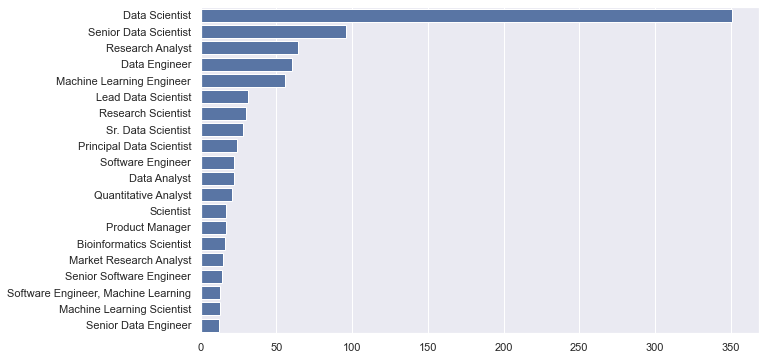

In [20]:
positions = df['position'].value_counts()
top10_positions = positions.head(20)
plt.subplots(figsize=(10,6))
sns.barplot(x=top10_positions.values, y=top10_positions.index, orient='h', color='b');

In [132]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter

In [130]:
def word_frequency(sentence):
    sentence = " ".join(sentence)
    
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    
    counted_list = [Counter(ngrams(new_tokens, x)) for x in [1,2,3]]
    col_names = ['word', 'pairs', 'trigrams']
    df_list = []
    for counted, name in zip(counted_list, col_names):
        df = pd.DataFrame(counted.items(), columns=[name,'frequency'])
        df.sort_values(by='frequency',ascending=False,inplace=True)
        df_list.append(df)
        
    word_freq = df_list[0] 
    word_pairs = df_list[1]
    trigrams = df_list[2]
    
    return word_freq, word_pairs, trigrams

In [23]:
data2, data3, data4 = word_frequency([str(x) for x in list(df['position'])])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

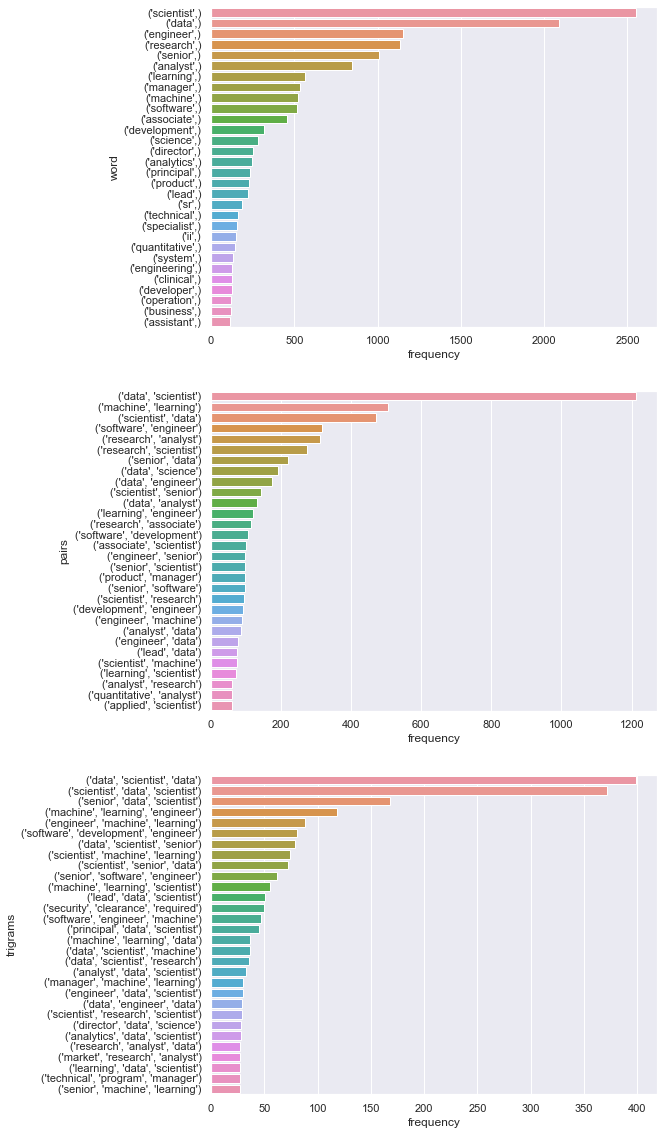

In [24]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

# Company field analysis

In [30]:
print(df['company'].nunique())
print(df['company'].count())

2213
6953


<AxesSubplot:>

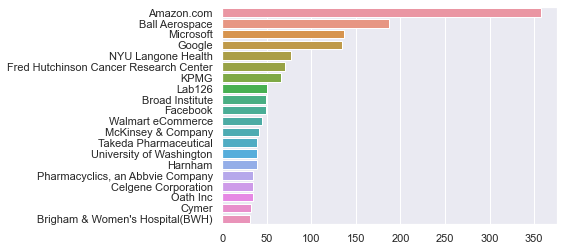

In [41]:
companies = df['company'].value_counts()
top20_companies = companies.head(20)
sns.barplot(x=top20_companies.values, y=top20_companies.index)
# top20_companies

In [56]:
num_letters = df['company'].apply(lambda x: len(str(x)))
count_num_letters = num_letters.value_counts().head(30).sort_values(ascending=False)

<AxesSubplot:>

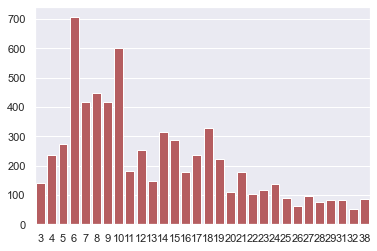

In [58]:
sns.barplot(y= count_num_letters.values, x=count_num_letters.index, color='r')

In [69]:
companies = df['company'].copy()
num_letters = companies.apply(lambda x: len(str(x)))
num_letters.name = 'num_letters'

In [71]:
a = pd.DataFrame(companies)
b = pd.DataFrame(num_letters)
c = pd.concat([a,b], axis=1)

In [75]:
d = c.sort_values(by='num_letters', ascending=False)
d

,company,num_letters
3821,Hitachi Chemical Advanced Therapeutics Solutio...,95
3205,Hitachi Chemical Advanced Therapeutics Solutio...,95
3757,Eurofins Lancaster Laboratories Professional S...,69
6076,Eurofins Lancaster Laboratories Professional S...,69
6545,Workers' Compensation Insurance Rating Bureau ...,67
...,...,...
762,EY,2
2446,EY,2
4801,HP,2
384,T3,2


In [79]:
d.loc[3821].company

'Hitachi Chemical Advanced Therapeutics Solutions, LLC (formerly PCT Cell Therapy Services, LLC)'

# Location field analysis

In [8]:
locations = df.location.copy()
locations

0        Atlanta, GA 30301 
1               Atlanta, GA
2               Atlanta, GA
3        Atlanta, GA 30303 
4               Atlanta, GA
               ...         
6959          Sunnyvale, CA
6960          Sunnyvale, CA
6961          Sunnyvale, CA
6962          Sunnyvale, CA
6963    Sunnyvale, CA 94089
Name: location, Length: 6964, dtype: object

In [9]:
locations.value_counts()

Seattle, WA             563
New York, NY            508
Cambridge, MA           487
Boston, MA              454
San Francisco, CA       425
                       ... 
Little Falls, NJ          1
Washington, DC 20422      1
Kenilworth, NJ            1
Bedminster, NJ            1
Chicago, IL 60616         1
Name: location, Length: 382, dtype: int64

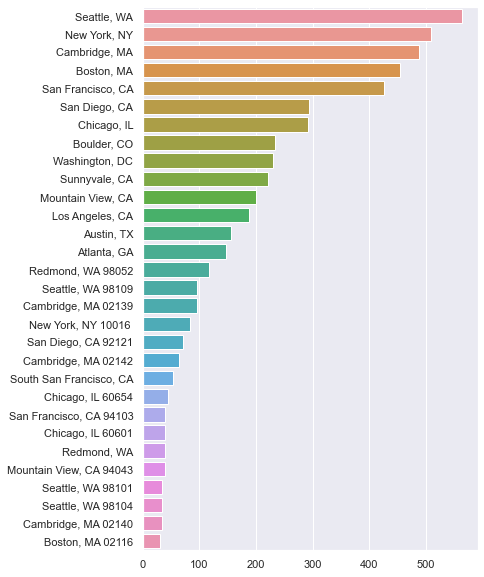

In [12]:
top20_locations = locations.value_counts().head(30)
plt.subplots(figsize=(6,10))
sns.barplot(x=top20_locations.values, y=top20_locations.index)
plt.show()

In [15]:
# top20_locations.index[0].isalpha()
# any(el.isdigit() for el in top20_locations.index[29])
# locations.apply(lambda name: any(el.isdigit() for el in str(name)))
locations = pd.DataFrame(locations)
locations['has number'] = locations['location'].apply(lambda name: any(el.isdigit() for el in str(name)))
locations

,location,has number
0,"Atlanta, GA 30301",True
1,"Atlanta, GA",False
2,"Atlanta, GA",False
3,"Atlanta, GA 30303",True
4,"Atlanta, GA",False
...,...,...
6959,"Sunnyvale, CA",False
6960,"Sunnyvale, CA",False
6961,"Sunnyvale, CA",False
6962,"Sunnyvale, CA",False


In [16]:
locations['has number'].value_counts()

False    4821
True     2143
Name: has number, dtype: int64

In [32]:
locations_no_number = locations.copy()

In [85]:
foo = lambda name: ''.join(i.rstrip() for i in str(name) if not i.isdigit())
locations_no_number = locations_no_number['location'].apply(foo)

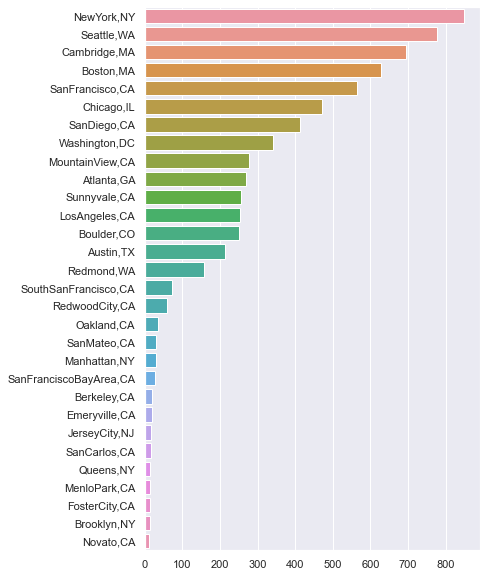

In [54]:
locations_no_number_count = locations_no_number.value_counts()
top30_locations_no_number_count = locations_no_number.value_counts().head(30)
plt.subplots(figsize=(6,10))
sns.barplot(x= top30_locations_no_number_count.values,
            y=top30_locations_no_number_count.index);

<AxesSubplot:>

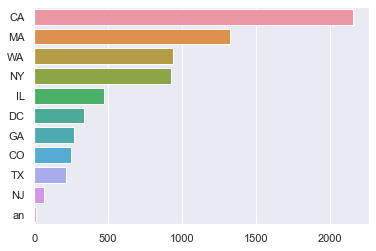

In [92]:
states_count = locations_no_number.apply(lambda x: x.replace(' ','')[-2:]).value_counts()
sns.barplot(x=states_count.values, y=states_count.index)

'an' state abbreviation means nan (nan location).

$$
\text{density of jobs in a given state} = \frac{\sum \text{jobs}}{\sum \text{cities}}
$$

In [55]:
# locations_no_number[locations_no_number.endswith('CA')]
locations_no_number[locations_no_number.apply(lambda x: str(x).endswith('CA'))].nunique()

34

In [79]:
num_cities_list = []
for abbr in states.index:
    num_cities_list.append(locations_no_number[locations_no_number.apply(lambda x: str(x).endswith(abbr))].nunique())

num_cities_df = pd.DataFrame({'state': states.index, 'num_cities': num_cities_list})

In [103]:
num_cities_df

,state,num_cities
0,CA,34
1,MA,2
2,WA,2
3,NY,16
4,IL,1
5,DC,1
6,GA,1
7,CO,1
8,TX,3
9,NJ,31


In [105]:
# locations_no_number.groupby(by='state')
location_new_df = pd.DataFrame(states_count).reset_index().rename(columns= {'index': 'state', 'location': 'num_jobs'})
location_new_df

,state,num_jobs
0,CA,2152
1,MA,1323
2,WA,935
3,NY,926
4,IL,471
5,DC,340
6,GA,269
7,CO,251
8,TX,218
9,NJ,68


In [106]:
location_new_df = pd.merge(location_new_df, num_cities_df, on="state")
location_new_df['job density'] = location_new_df['num_jobs'] / location_new_df['num_cities']
location_new_df

,state,num_jobs,num_cities,job density
0,CA,2152,34,63.294118
1,MA,1323,2,661.500000
2,WA,935,2,467.500000
3,NY,926,16,57.875000
4,IL,471,1,471.000000
5,DC,340,1,340.000000
6,GA,269,1,269.000000
7,CO,251,1,251.000000
8,TX,218,3,72.666667
9,NJ,68,31,2.193548


In [100]:
location_new_df[['state', 'job density']].sort_values('job density', ascending=False)

,state,job density
1,MA,661.500000
4,IL,471.000000
2,WA,467.500000
5,DC,340.000000
6,GA,269.000000
7,CO,251.000000
8,TX,72.666667
0,CA,63.294118
3,NY,57.875000
10,an,11.000000


In [101]:
a = pd.DataFrame(locations_no_number)
a['state'] = a['location'].apply(lambda x: x.replace(' ','')[-2:])
a[a['state']=='an']

,location,state
302,nan,an
331,nan,an
466,nan,an
482,nan,an
3337,nan,an
5014,nan,an
5059,nan,an
5103,nan,an
5114,nan,an
6093,nan,an


In [23]:
locations_no_number

0        Atlanta, GA  
1          Atlanta, GA
2          Atlanta, GA
3        Atlanta, GA  
4          Atlanta, GA
             ...      
6959     Sunnyvale, CA
6960     Sunnyvale, CA
6961     Sunnyvale, CA
6962     Sunnyvale, CA
6963    Sunnyvale, CA 
Name: location, Length: 6964, dtype: object

# Review field analysis

In [114]:
df['reviews'].describe()

count      5326.000000
mean       3179.089185
std        8448.515056
min           2.000000
25%          27.000000
50%         230.000000
75%        1578.000000
max      148114.000000
Name: reviews, dtype: float64

In [117]:
df['reviews'].isnull().sum()

1638

# Description field analysis

In [119]:
df['description']

0       Development Director\nALS Therapy Development ...
1       Job Description\n\n"The road that leads to acc...
2       Growing company located in the Atlanta, GA are...
3       DEPARTMENT: Program OperationsPOSITION LOCATIO...
4       DESCRIPTION\nThe Emory University Department o...
                              ...                        
6959    Are you data-driven? We at NetApp believe in t...
6960    Pharmacyclics is committed to the development ...
6961    Oath, a subsidiary of Verizon, is a values-led...
6962    We are the Bing Core Relevance team responsibl...
6963    Comcast’s Technology &amp; Product organizatio...
Name: description, Length: 6964, dtype: object

In [128]:
df['description'][0]

"Development Director\nALS Therapy Development Institute has an immediate opening for Development Directors. Reporting directly to the Senior Development Director, the Development Director at ALS TDI is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events, generating awareness of ALS TDI; outreach including attending and speaking at events as well as personally cultivates relationships with patients, prospects and donors. This position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year. This position will be located in Atlanta, GA.\n\nRequirements:\nBachelor's Degree requiredMinimum 6-8 years' experience in fundraising and business developmentSuccessful track recording in fundraising with major donors or scientific sales preferredDemonstrated ability to work in

In [140]:
import _pickle as cPickle

In [172]:
# with open(r"./data/cache/someobject3.pickle", "wb") as output_file:
#     cPickle.dump(data3, output_file)

In [174]:
for idx in range(0,30,1):
    df_chunk = df['description'][idx::60]
    df_chunk = df_chunk.apply(lambda x: str(x))
    word, pairs, trigrams = word_frequency([str(x) for x in df_chunk])
    for jdx, data in enumerate([word, pairs, trigrams]):
        with open(f"./data/cache/data{jdx}_chunk{idx}.pickle", "wb") as file:
            cPickle.dump(data, file)

In [171]:
df_chunk = df['description'][59::60]

In [ ]:
data_a, data2_a, data3_a = word_frequency([str(x) for x in df['description'].sample(500)])

In [135]:
data, data2, data3 = word_frequency([str(x) for x in df['description'].sample(500)])

In [144]:
data

,word,frequency
6,"(data,)",2909
180,"(experience,)",2354
68,"(team,)",1603
121,"(work,)",1461
148,"(research,)",1308
...,...,...
6303,"(phrase,)",1
6307,"(saturday,)",1
6311,"(ascp,)",1
6312,"(seeker,)",1


<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

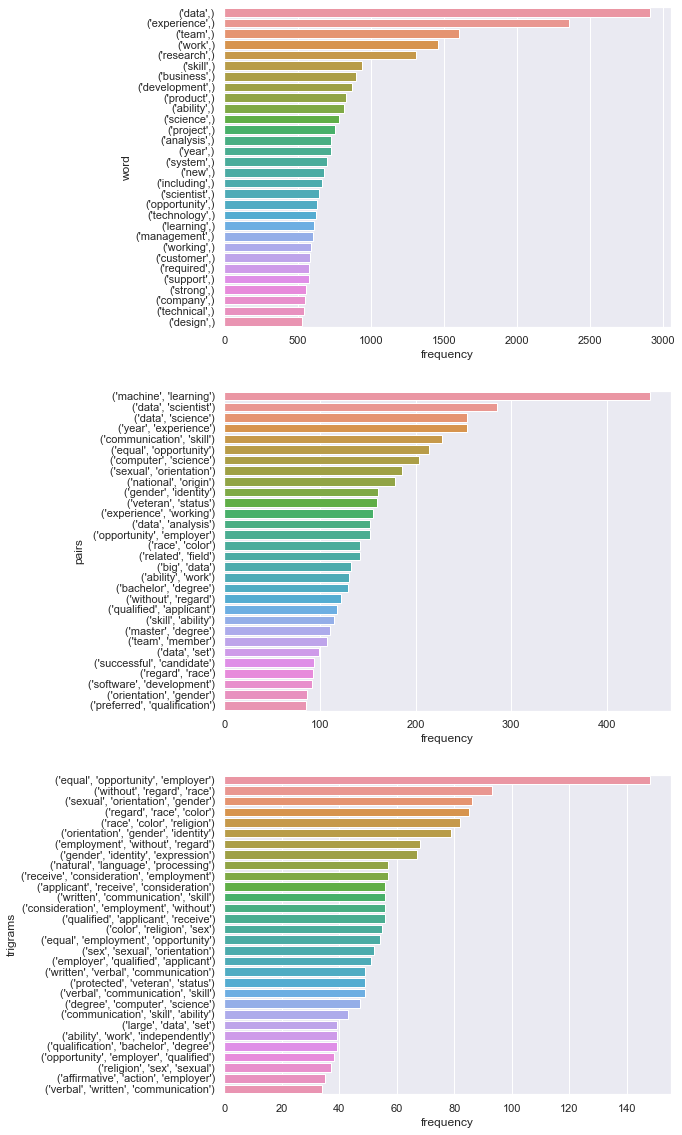

In [139]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data2.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data3.head(30))

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


# Geopandas

In [28]:
import geopandas

In [42]:
# gdf = geopandas.GeoDataFrame(a)
all_states = geopandas.read_file(r'./data/states_21basic/states.shp')

In [55]:
all_states2 = all_states.copy()

In [67]:
states = pd.DataFrame(states).reset_index()
states.rename(columns={'index': 'STATE_ABBR', 'location': 'jobs'}, inplace=True)

In [68]:
states

,STATE_ABBR,jobs
0,CA,2152
1,MA,1323
2,WA,935
3,NY,926
4,IL,471
5,DC,340
6,GA,269
7,CO,251
8,TX,218
9,NJ,68


In [71]:
all_states_jobs = pd.merge(all_states, states, on="STATE_ABBR",  how = 'left')

In [76]:
all_states_jobs.fillna(0, inplace=True)

<AxesSubplot:>

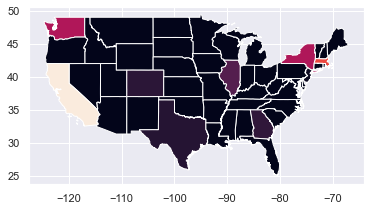

In [81]:
all_states_jobs[~all_states_jobs['STATE_ABBR'].isin(['AK','HI'])].plot('jobs')

# Draft

In [128]:
in_string = '4324 fds'
out_string = filter(lambda c: not c.isdigit(), in_string)
''.join(list(out_string))

' fds'

In [129]:
myStr = '34234 fdsf'
''.join(i for i in myStr if not i.isdigit())

' fdsf'

In [57]:
df_A = pd.DataFrame({'a': [1,2,3], 'b': [2,3,4]})
df_B = pd.DataFrame({'b': [1,2,4], 'c': [6,7,8]})

In [60]:
pd.merge(df_A, df_B, on="b",  how = 'left')

,a,b,c
0,1,2,7.0
1,2,3,NaN
2,3,4,8.0


# Draft GeoPandas

In [43]:
type(all_states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

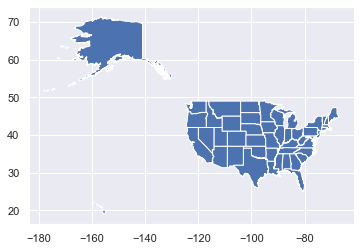

In [44]:
all_states.plot()

<AxesSubplot:>

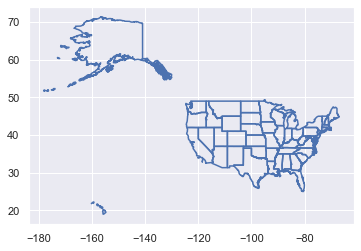

In [45]:
all_states.boundary.plot()

<AxesSubplot:>

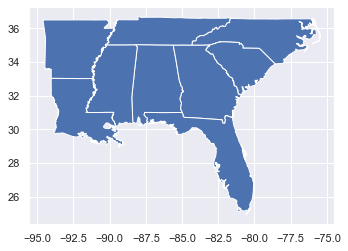

In [40]:
all_
states[states['STATE_ABBR'].isin(['FL','GA','AL','SC','NC', 'TN', 'AR', 'LA', 'MS'])].plot()

<AxesSubplot:>

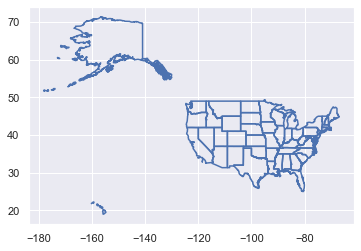

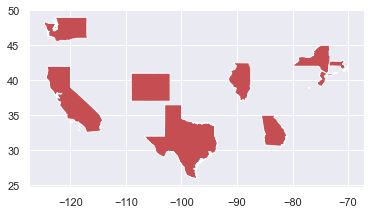

In [53]:
all_states.boundary.plot()
all_states[all_states['STATE_ABBR'].isin(states.index)].plot(color='r')